# **중간고사 이전 내용 총 정리**

In [1]:
import torch
import torchvision

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import PIL

import requests
import io

## **Pre-Learning : 텐서**

---

### **A. 벡터**

`-` Vector 선언

In [ ]:
torch.tensor([1, 2, 3])

`-` Vector 덧셈

In [ ]:
torch.tensor([1, 2, 3]) + torch.tensor([2]*3)
torch.tensor([1, 2, 3]) + 2 ## 브로드캐스팅

### **B. 벡터와 매트릭스**

`-` 브로드 캐스팅

In [ ]:
## 브로드 캐스팅
torch.tensor([[1, 2],
              [3, 4],
              [5, 6]]) - 1

## 다른 연산
torch.tensor([[1, 2], [3, 4], [5, 6]])*0

In [ ]:
## 열별 브로드 캐스팅
torch.tensor([[1, 2], [3, 4], [5, 6]]) + torch.tensor([[-1],
                                                       [-3],
                                                       [-5]])

## 행별 브로드캐스팅
torch.tensor([[1, 2], [3, 4], [5, 6]]) + torch.tensor([[-1, -2]])

`-` 벡터와의 연산 : 열벡터로 취급

In [7]:
torch.tensor([[1, 2], [3, 4], [5, 6]]) + torch.tensor([1, 2])
torch.tensor([[1, 2], [3, 4], [5, 6]]) + torch.tensor([1, 2, 3]) ## 안됨

tensor([[2, 4],
        [4, 6],
        [6, 8]])

`-` 행렬곱

In [ ]:
## 정상적인 행렬곱
torch.tensor([[1, 2], [3, 4], [5, 6]]) @ torch.tensor([[1],
                                                       [2]])
torch.tensor([[1, 2], [3, 4], [5, 6]]) @ torch.tensor([1, 2]) ## 열벡터

`-` 벡터는 행렬곱 연산에서 열벡터도로, 행벡터로도 취급할 수 있음

In [ ]:
torch.tensor([[1, 2, 3]]) @ torch.tensor([[1, 2], [3, 4], [5, 6]])
torch.tensor([1, 2, 3]) @ torch.tensor([[1, 2], [3, 4], [5, 6]])

### **C. transpose, reshape**

`-` 전치

In [16]:
torch.tensor([[1, 2], [3, 4]]).T

tensor([[1, 3],
        [2, 4]])

`-` reshape

In [ ]:
torch.tensor([[1,2],[3,4],[5,6]]).reshape(2,-1) ## [[1, 2, 3], [4, 5, 6]]
torch.tensor([[1,2],[3,4],[5,6]]).reshape(-1,6)
torch.tensor([[1,2],[3,4],[5,6]]).reshape(-1)

### **D. concat, stack**

`-` concat(차원 유지, 쉬움)

In [18]:
a = torch.tensor([[1], [3], [5]])
b = torch.tensor([[2], [4], [5]])
torch.concat([a, b], axis = 1)

tensor([[1, 2],
        [3, 4],
        [5, 5]])

`-` stack(차원 늘림, 어려움)

In [19]:
a = torch.tensor([1, 3, 5])
b = torch.tensor([2, 4, 6])
torch.stack([a, b], axis = 1)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [21]:
torch.concat([a.reshape(3, 1), b.reshape(3, 1)], axis = 1)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

## **1. 회귀**

---

### **A. 내용**

`-` 단순선형회귀모형

$$\begin{align} y_i & = w_0 + w_1 x_i + \epsilon, ~ i = 1, 2, \cdots \\
{\bf y} & = {\bf WX + \epsilon}
\end{align}$$

* 단순선형회귀에서 최적화하고자 하는 파라미터

$$ loss(\hat{w}_0,\hat{w}_1) := loss(\hat{\bf W})=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$$

$$\hat{\bf W}^{LSE} = \underset{\bf \hat{W}}{\operatorname{argmin}} ~ loss(\hat{\bf W})$$

> 위의 식은
> $\hat{\bf W} = \underset{\bf W}{\operatorname{argmin}} ~ loss({\bf W})$
> 로 생각해도 무방

### **B. 구현**

In [87]:
x = torch.arange(1, 10, 0.1)
y = (2*x + torch.randn(90) + 5).reshape(-1, 1) ## 꼭 y 차원은 (n, k)로 맞춰줄 것

`-` 쌩으로 구현(미분만 사용)

In [80]:
## data
What = torch.tensor([[1.0], [2.0]], requires_grad = True) ## 매개변수 넣어야 미분 가능
X = torch.stack([torch.ones(len(x)), x], axis = 1)

##---##
for epoc in range(1000) :
    yhat = X@What
    
    loss = torch.mean((yhat-y)**2)
    loss.backward()

    What.data -= 0.01*What.grad ## learning rate == 0.01 -> nan 나오면 이걸 조정
    What.grad = None

`-` 네트워크, 손실함수, 옵티마이저 사용

In [92]:
# net = torch.nn.Linear(in_features = 1, out_features = 1, bias = True) ## 이쪽이 일반적
net = torch.nn.Linear(in_features = 2, out_features = 1, bias = False)
net.weight.data = torch.tensor([[1.0, 2.0]]) ## 행벡터로 삽입
# net.bias.data = torch.tensor([1.0])

loss_fn = torch.nn.MSELoss() ## calla회귀 문제에서 일반적으로 사용
optimizr = torch.optim.SGD(net.parameters(), lr = 0.01) ## iterabla obj : 데이터와 그래디언트

##---##
for epoc in range(1000) :
    yhat = net(X)
    
    loss = loss_fn(yhat, y)
    loss.backward()

    optimizr.step()
    optimizr.zero_grad()

> `bias`를 넣든, 안넣고 따로 설명변수 매트릭스를 넣든, 둘 다 하든지간에 `yhat`과 추정 결과는 동일함(다만 효율이랑 가시성이 좀 구리겠지...)

## **2. 로지스틱**

---

### **A. 내용**

> 이진 분류 문제를 해결하기 위한 가장 기초적인 모형
>
> 순방향 구조, 선형 구조만 제대로 설명할 수 있다는 점에서 모형의 표현력이 다소 낮음

-   회귀모형: $y_i \sim {\cal N}(w_0+w_1x_i, \sigma^2)$ -> 정규분포의 평균 예측

-   로지스틱: $y_i \sim {\cal B}(\pi_i),\quad$ where $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)} = \frac{1}{1+\exp(-w_0-w_1x_i)}$
> 베르누이의 평균(확률값)을 예측

### **B. 구현**

`-` 쌩으로 구현(미분만 이용)

In [154]:
X = torch.randn((100, 1))
prob = 1 / (1 + torch.exp(- X @ torch.tensor([[2.0]]) - 0.5))
y = torch.bernoulli(prob)

In [155]:
What = torch.tensor([[1.0],
                     [1.0]], requires_grad = True) ## 절편 추가

def sigmoid(x) :
    return 1/(1+torch.exp(-(What[0] + What[1]*x)))

for epoc in range(1000) :
    yhat = sigmoid(X)

    ## MLE니까 가능도가 가장 높은 -> -l이 가장 작은 것을 찾는 최적화 문제로 바꿈
    loss = -torch.sum(y*torch.log(yhat) + (1-y)*torch.log(1-yhat)) ## 강의 노트엔 그냥 MSELoss 쓰긴 함...
    loss.backward()
    
    What.data -= 0.1*What.grad
    What.grad = None

`-` 네트워크, BCELoss, Adam 사용

In [195]:
net = torch.nn.Sequential(
    torch.nn.Linear(1, 1), ## 이진 분류문제이므로 y의 차원은 1
    torch.nn.Sigmoid()
)
net[0].weight.data = torch.tensor([[1.0]])
net[0].bias.data = torch.tensor([1.0])

loss_fn = torch.nn.BCELoss()

## 지역 최소값에 잘 빠지지 않고, 최적화 속도가 빠름
optimizr = torch.optim.Adam(net.parameters(), lr = 0.1)

##---##
for epoc in range(300) :
    yhat = net(X)
    
    loss = loss_fn(yhat, y)
    loss.backward()
    
    optimizr.step()
    optimizr.zero_grad()

## **3. 신경망, ReLU, 사용자 정의 네트워크**

---

### **A. 내용**

* 시그모이드에 넣기 전, 꺾인 그래프를 만들어 로지스틱의 표현력을 확보
* 언더라잉이 로지스틱이라면 신경망의 성능이 더 안좋을 수 있음(Test dataset에서)
* 신경망의 경우 회귀분석과 달리 여러 개의 최적값이 존재할 수 있음 -> 한 개의 global minimum만 가지지 않을 수 있음

`-` 신경망의 표현

$$\underset{(n,784)}{\bf X} \overset{l_1}{\to} \underset{(n,32)}{\boldsymbol u^{(1)}} \overset{relu}{\to} \underset{(n,32)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{sig}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}} =\underset{(n,1)}{\hat{\boldsymbol y}}$$

* $l_k$ : 선형 변환 -> 아래의 괄호로 변환된 차원 확인

> 보통 $u$라고 표기하기도 함

* $relu, ~ sig$ : 비선형 변환, 파라미터 없음

### **B. 구현**

`-` `ReLU`

In [ ]:
x = torch.arange(-10, 10).float()
relu = torch.nn.ReLU()

## v자 그래프
relu(x) + relu(-x)

## A자 그래프
- relu(x) - relu(-x)

In [ ]:
## 브로드캐스팅
u = torch.stack([x, -x], axis = 1)
v = relu(u)

-4.5*v[:, [0]] - 9.0*v[:, [1]] + 4.5 ## 이 경우 [0]번 열이 뒤쪽, [1]번 열이 앞쪽 모양을 담당

## 선형 결합
l2 = torch.nn.Linear(2, 1, bias = True)
l2.weight.data = torch.tensor([[-4.5, -9.0]])
l2.bias.data = torch.tensor([4.5])

l2(v)

## 두 번의 선형 결합
l1 = torch.nn.Linear(1, 2)
l1.weight.data = torch.tensor([[1.0], [-1.0]]) ## 실제로 행벡터를 넣어야 하니 반대로...
l1.bias.data = l1.bias.data*0

l2(relu(l1(x.reshape(-1, 1))))

`-` 기초적인 신경망(분류)

> 회귀의 경우 시그모이드 빼고, `MSELoss`를 사용

In [188]:
net = torch.nn.Sequential(
    torch.nn.Linear(1, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
    torch.nn.Sigmoid()
)

loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())

##---##
for epoc in range(300) :
    yhat = net(X)

    loss = loss_fn(yhat, y)
    loss.backward()

    optimizr.step()
    optimizr.zero_grad()

### **C. 사용자 정의 네트워크**

`-` `H`

In [216]:
class H(torch.nn.Module) :
    def __init__(self) :
        super().__init__() ## 슈퍼 클래스의 __init__을 그대로 상속

    def forward(self, u) :
        ## 메소드 오버라이딩
        h = lambda x : torch.sigmoid(200*(x+0.5)) + torch.sigmoid(-200*(x-0.5)) - 1.0
        v = h(u)
        return v

`-` `Flatten` : 이미 `torch.nn.Flatten()`이 있긴 함

In [217]:
class Flatten(torch.nn.Module) :
    '''
    이미지를 DNN으로 분류할 때만 첫 레이어 이전에 사용
    '''
    def __init__(self) :
        super().__init__()
        
    def forward(self, X) :
        return X.reshape(-1, X.shape[1]*X.shape[2]*X.shape[3])

## **4. 시벤코 정리**

---

> 하나의 은닉층을 가지는 네트워크는 모든 보렐 가측함수 $f: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$를 원하는 정확도로 근사시킬 수 있음
>
> 이 때, 은닉층의 활성화함수는 어떤 것이여도 상관없음 (`ReLU`, `Sidmoid`, `H`, ...)
>
> 즉, 하나의 은닉층을 가진 신경망의 표현력은 거의 무한대라 볼 수 있음

`-` 그래도 혹시 모르니까 시그모이드로 계단 만드는 코드 실습...

> 그냥 요즘은 데이터 structure를 따라가는 구조를 만드는 데에 너무 집중하지 않아도 되니까, 모양을 직접 구현하는 것까지는 안해도 될듯

In [83]:
x = torch.arange(-1.5, 1.5, 0.05).reshape(-1, 1).float()

l1 = torch.nn.Linear(1, 3)
a1 = torch.nn.Sigmoid()
l2 = torch.nn.Linear(3, 1)

In [85]:
l1.weight.data = torch.tensor([[-50.0], [50.0], [-50.0]])
l1.bias.data = torch.tensor([-50.0, 0.0, 50.0]) ## weight*(x - bias)

In [86]:
l2.weight.data = torch.tensor([[1.0, 2.0, 1.0]])
l2.bias.data = torch.tensor([-1.0])

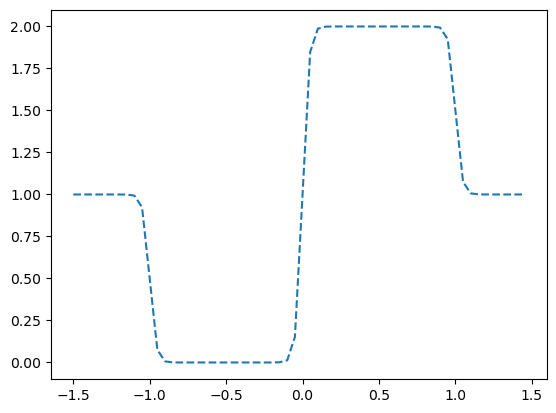

In [88]:
plt.plot(x, l2(a1(l1(x))).data, '--');

## **5. 평가, 오버피팅, Dropout**

---

> 하나 이상의 은닉층을 가지는 네트워크의 표현력은 거의 무한대임. 그렇기 때문에 맞추지 말아야 할 오차항까지 맞출 수 있음.
>
> 네트워크가 학습하지 못한 자료에서도 신경망이 올바르게 작동한다는 보장은 없음.

### **A. 스코어링**

* 모형 훈련 시에는 `net.train()`을 사용하여 훈련 모드로 전환한다.
* 스코어 산출 시에는 `net.eval()`을 사용하여 평가 모드로 전환한다.

`-` **MSE**

In [ ]:
net.eval()

train_mse = torch.mean((y - net(X).data)**2) ## loss_fn(net(X), y)
test_mse = torch.mean((yy - net(XX).data)**2) ## loss_fn(net(XX), yy)

`-` **Accuracy**

In [ ]:
net.eval()

## 확률을 비교하는 경우
train_acc = ((net(X) > 0.5) == y).float().mean() ## loss_fn(net(X), y)
test_acc = ((net(XX) > 0.5) == yy).float().mean() ## loss_fn(net(XX), yy)

In [ ]:
net.eval()

## 로짓을 비교하는 경우
train_acc = ((net(X) > 0.0) == y).float().mean() ## loss_fn(net(X), y)
test_acc = ((net(XX) > 0.0) == yy).float().mean() ## loss_fn(net(XX), yy)

In [ ]:
net.eval()

## 다항분류의 경우
train_acc = (net(X).argmax(axis = 1) == y.argmax(axis = 1)).float().mean()
test_acc = (net(XX).argmax(axis = 1) == yy.argmax(axis = 1)).float().mean()

### **B. `Dropout`**

* 각 파라미터를 p 확률로 0을 만든다. 0이 아닌 파라미터들은 빠진만큼 대략 1/p의 가중치를 곱해준다.
* 활성화함수 뒤에 사용하지만, `ReLU`의 경우 그 앞에 사용해도 동일한 효과를 제공한다. 해당 방법이 컴퓨팅 관점에서 더 효율적이다.

In [199]:
x = torch.linspace(0, 1, 100).reshape(-1, 1)
y = torch.randn(100).reshape(-1, 1)

xx = torch.randn((10, 1))*0.5 + 0.5
yy = torch.randn((10, 1))

In [213]:
net = torch.nn.Sequential(
    torch.nn.Linear(1, 256),
    torch.nn.Dropout(0.9), ## 대략 절반의 파라미터를 0으로 날림.
    torch.nn.ReLU(),
    torch.nn.Linear(256, 1)
)

loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters(), lr = 0.01)

for epoc in range(300) :
    net.train() ## training mode activate
    yhat = net(x)
    loss = loss_fn(yhat, y)
    loss.backward()
    optimizr.step()
    optimizr.zero_grad()

    if epoc % 50 == 0 :
        net.eval() ## evaluation mode activate -> dropout 적용
        yyhat = net(xx)
        test_score = loss_fn(yyhat, yy).data
        print(f"test MSE = {test_score:.4f}")

test MSE = 0.8740
test MSE = 0.8660
test MSE = 0.9568
test MSE = 0.8990
test MSE = 0.9426
test MSE = 0.9546


## **6. 텐서 포맷 변환**

---

### **A. 이미지 포맷**

`-` `matplotlib`에서의 이미지 텐서 포매팅 : `(h, w, c)`

In [ ]:
plt.imshow(img, cmap = "gray") ## img 텐서의 자료형이 float이면 0~1로 먹임

`-` 파이토치에서의 이미지 텐서 포매팅 : `(n, c, h, w)`

`-` `PIL`(Python Image Library; pillow) 텐서 변환

* 이미지 파일 크기 통일 및 텐서 변환

In [14]:
compose = torchvision.transforms.Compose([
    torchvision.transforms.Resize((512, 512)), ## 이미지 사이즈 통일
    torchvision.transforms.ToTensor() ## 이미지를 텐서로 변환
])

X = torch.stack([compose(train_dataset[i][0]) for i in range(len(train_dataset))], axis = 0)
XX = torch.stack([compose(test_dataset[i][0]) for i in range(len(test_dataset))], axis = 0)

y = torch.tensor([train_dataset[i][1] for i in range(len(train_dataset))]).reshape(-1, 1).float()
yy = torch.tensor([test_dataset[i][1] for i in range(len(test_dataset))]).reshape(-1, 1).float()

## 이진분류가 아닐 때 - 정수형
# y = torch.tensor([train_dataset[i][1] for i in range(len(train_dataset))]).reshape(-1, 1)
# yy = torch.tensor([test_dataset[i][1] for i in range(len(test_dataset))]).reshape(-1, 1)

### **B. 행렬 변환 도구**

In [ ]:
## 전치, 축변환 -> (h, w, c)로 변경
torch.einsum("ochw -> hwc", torch_img)
torch_img.sqeuuze().permute(1, 2, 0)

## 행렬곱 -> 곱해서 없어질 차원에 대한 문자열 동일하게 설정
torch.einsum("ochw, kc -> khw", torch_img, linr.weight.data) + linr.bias.data

## **7. GPU, 배치 사용법**

---

`-` 데이터셋 배치

> 확률적 경사하강법 장점
>
> * GPU 메모리를 덜 사용함
> * 에폭 별 학습에 데이터 전체를 사용하지 않아 오버피팅을 방지(배깅 느낌)
> * 최적화 도중 로컬 미니멈에 빠져도 잘 빠져나옴

In [ ]:
ds_train = torch.utils.data.TensorDataset(X, y)
dl_train = torch.utils.data.DataLoader(ds_train, batch_size = 1024, shuffle = True)

ds_test = torch.utils.data.TensorDataset(XX, yy)
dl_test = torch.utils.data.DataLoarder(dl_test, batch_size = 1024) ## 테스트라 셔플 X

`-` GPU 학습

In [ ]:
## 간단한 신경망
net = torch.nn.Sequential(
    torch.nn.Linear(1, 1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 1)
).to("cuda:0") ## 얘는 to("cuda:0") 하면 객체 자체가 바뀜

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())

##---## 에폭 수는 기존 에폭 / (len(X)/batch_size)
for epoc in range(100) :
    net.train()
    
    for Xm, ym in dl_train :
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        netout = net(Xm)

        loss = loss_fn(netout, ym)
        loss.backward()
    
        optimizr.step()
        optimizr.zero_grad()

    if epoc % 50 == 0 :
        net.eval()
    
        s = 0
        
        for XXm, yym in dl_test :
            XXm = XXm.to("cuda:0")
            yym = yym.to("cuda:0")
    
            s += ((net(XXm) > 0.0) == yym).sum()
    
        test_acc = s/len(XX)
        print(f"epoch : {epoc},\ttest_acc = {test_acc}")

torch.cuda.empty_cache()

## **8. 다항분류**

---

`-` 분류별 이론

|**분류**|**오차항의 가정**|**마지막 활성화함수**|**손실함수**|
|:-:|:-:|:-:|:-:|
|이항분류|이항분포|sigmoid|Binary Cross Entropy|
|다항분류|다항분포|softmax|Cross Entropy|


> 소프트 맥스 == 일반화 로짓 -> 나온 로짓 값에 지수함수 먹이고 상대비율로 추정

`-` 코딩용

|**분류**|**netout의 의미**|**손실함수**|
|:-:|:-:|:-:|
|이항분류|prob|`BCELoss`|
|이항분류|logit|`BCEWithLogitsLoss`|
|다항분류|prob|그런거 없음|
|다항분류|logits|`CrossEntropyLoss`|

`-` 원-핫 인코딩

> `y`가 정수형일 경우 파이토치가 알아서 범주형으로 인식

In [ ]:
y = torch.nn.functional.one_hot(y.reshape(-1).long()) ## 1차원 정수형이여야 함

## **9. CNN**

---

### **A. 사용법**

* 다항 분류 및 이미지 처리가 뛰어남
* 복잡한 구조의 DNN보다 더 빠르고, 성능이 좋고, 파라미터의 수가 적음

`-` 학습 과정

In [ ]:
net = torch.nn.Sequential(
    ##-----layer 1 : 2d part-----##
    ## 해당 파트에서 일반적으로 컴퓨팅 자원을 많이 할당. 레이어 많이 씀
    torch.nn.Conv2d(1, 64, kernel_size = 5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size = 5),

    torch.nn.Flatten(),

    ##-----layer 2 : 1d part-----##
    ## 해당 파트의 네트워크는 약하게 구성하는 경우가 많음
    torch.nn.Linear(???, p) ## 아무 숫자나 넣어보고 오류가 생기면 해당 숫자만 수정
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

##---##
for epoc in range(300) :
    netout = net(X)

    loss = loss_fn(netout, y)
    loss.backward()

    optimizr.step()
    optimizr.zero_grad()

### **B. CNN 핵심 레이어**

**특징을 추출하고 -> 다변화하고 -> 요약**

`-` `torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding = 0, bias = True)`

* 컨볼루션 커널
* 텐서에 커널 사이즈만한 윈도우를 통과시키고, 각 원소에 `weight`의 값을 가중평균 해줌. 최종적으로 `bias`를 더함. `stride`만큼 이동하여 반복.
* 각 원소에 행렬 원소를 곱하여 더한다는 측면에서 선형 변환
* 패딩을 해주지 않으면 거의 필연적으로 텐서 사이즈가 줄어듦

In [ ]:
conv = torch.nn.Conv2d(1, 1, 3, bias = False)
## 가중치 텐서가 4차원으로 들어감 -> 채널이나 obs별로도 가중치를 먹일 수 있는건가?
conv.weight.data = torch.tensor([[0.0, 1.0, 2.0],
                                 [2.0, 2.0, 0.0],
                                 [0.0, 1.0, 2.0]]).reshape(1, 1, 3, 3)

`-` `torch.nn.ReLU()`

* 특징을 더욱 다변화하기 위한 비선형 변환

`-` `torch.nn.MaxPool2d(kernel_size, stride)`

* 이미지에서 디테일은 버리고, 중요한 특징만 뽑아서 과장되게 요약
* 컨볼루션은 그림을 뭉개는 경향이 있으나, MaxPooling은 중요한 정보를 손실시키지 않으려고 함

## **10. 사전 구성 아키텍쳐**

---

* `torchvision.models`에 들어있는 메소드들은, 인스턴스화되어 각각의 변환을 멤버변수 뽑듯이 뽑아쓸 수 있다.

### **A. AlexNet**

In [8]:
torchvision.models.AlexNet()

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/960px-Comparison_image_neural_networks.svg.png)

`-` 알렉스넷 아키텍쳐

* Conv : kernel_size = 11, stride = 4
> 먼저 러프하게 보고 싶음 : 처음엔 큰 이미지를 대충대충 보고 싶음

* Pool : kernel_size = 3, stride = 2
> 처음엔 요약하고, 나중엔 요약하지 않고 싶음

* Conv : kernel_size = 3
> 조금 세밀하게 보고 싶음

* 마지막 Pool
> Flatten하기 직전이고, 데이터가 좀 많은 것 같아서 줄여줌

* 신경망 설계 부분
> ReLU : 1d part에서 표현력을 좀 더 얻어내고 싶다.
>
> 요약하고 싶었으면 Linear 한층만 받아도 충분했겠죠

### **B. resnet18**

In [ ]:
net = torch.nn.Sequential(
    ## layer 0
    torch.nn.Sequential(
        resnet18.conv1,
        resnet18.bn1, ## Batch Normalization : 컨볼루션 커널 결과를 정규화 / 비선형 성질 유지
        resnet18.relu,
        resnet18.maxpool
    ),

    resnet18.layer1,
    resnet18.layer2,
    resnet18.layer3,
    resnet18.layer4,

    ## head
    resnet18.avgpool,
    torch.nn.Flatten(), ## 원본 클래스의 forward에는 모듈이 아닌 torch.flatten()으로 들어감
    resnet18.fc
)

In [ ]:
resnet18 = torchvision.models.resnet18(pretrained = True) ## 가중치 가져오기
resnet18.fc = torch.nn.Linear(512, p) ## 몇개 범주로 구분할 것인지 설정

* 총 18개의 레이어

> 17개의 CNN 레이어 + 1개의 네트워크
>
> `downsample`은 네트워크가 아님(말그대로 다운 샘플링)
>
> 신경망이 깊기 때문에 레이어마다 배치 정규화를 해줌 -> 미분값이 0에 가까워지는 문제 해소
>
> `resnet18` 객체 자체는 subscriptable이 아님. 리스트로 호출할 수 없음

## **11. CAM - Class Activation Map**

---

`-` **기존 `resnet18`의 마지막 레이어 네트워크**
$$\underset{(1,3,512,512)}{\boldsymbol x} \overset{stem}{\to} \left( \underset{(1,512,16,16)}{\tilde{\boldsymbol x}} \overset{ap}{\to} \underset{(1,512,1,1)}{{\boldsymbol \sharp}}\overset{flattn}{\to} \underset{(1,512)}{{\boldsymbol \sharp}}\overset{linr}{\to} \underset{(1,1)}{\text{logit}}\right) = [[-5.5613]]$$

`-` **바꾸고 싶은 네트워크**
$$\underset{(1,3,224,224)}{\boldsymbol x} \overset{stem}{\to} \left( \underset{(1,512,16,16)}{\tilde{\boldsymbol x}} \overset{\_linr}{\to} \underset{(1,1,16,16)}{{\boldsymbol \sharp}}\overset{ap}{\to} \underset{(1,1,1,1)}{{\boldsymbol \sharp}}\overset{flattn}{\to} \underset{(1,1)}{\text{logit}}\right) = [[-5.5613]]$$

* `linr(flattn(ap(X)))` $\to$ `flattn(ap(_linr(X)))`

> `(1, c, h, w)` $\to$ `(1, c, 1, 1)` : `ap` 먼저
>
> `(1, c, h, w)` $\to$ `(1, 1, h, w)` : 선형결합으로 채널 통합 먼저 -> 러프 이미지 산출


* CAM의 한계

> head-part가 `ap`와 `linr`로만 구성되어 있어야 함. `AlexNet`과 같은 신경망은 헤드 파트를 임의로 바꿔줘야 함

### **Z. 데이터 준비**

* 이미지와 라벨로 구성된 `train_dataset`, `test_dataset`이 필요함

In [7]:
compose = torchvision.transforms.Compose([
    torchvision.transforms.Resize((512, 512)), ## 이미지 사이즈 통일
    torchvision.transforms.ToTensor() ## 이미지를 텐서로 변환
])

X = torch.stack([compose(train_dataset[i][0]) for i in range(len(train_dataset))], axis = 0)
XX = torch.stack([compose(test_dataset[i][0]) for i in range(len(test_dataset))], axis = 0)

y = torch.tensor([train_dataset[i][1] for i in range(len(train_dataset))]).reshape(-1, 1).float()
yy = torch.tensor([test_dataset[i][1] for i in range(len(test_dataset))]).reshape(-1, 1).float()

## 이진분류가 아닐 때 - 정수형
# y = torch.tensor([train_dataset[i][1] for i in range(len(train_dataset))]).reshape(-1, 1)
# yy = torch.tensor([test_dataset[i][1] for i in range(len(test_dataset))]).reshape(-1, 1)

### **A. 이미지 분류 잘하는 네트워크 선택 후 학습**

### **B. 마지막 1d 레이어 파트를 `_linr -> ap -> flatten` 형태로 바꿈**

In [ ]:
## step 1 : 데이터 로드
ds_train = torch.utils.data.TensorDataset(X, y)
dl_train = torch.utils.data.DataLoader(ds_train, batch_size = 32, shuffle = True)

ds_test = torch.utils.data.TensorDataset(XX, yy)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size = 32)


## step 2 : 모델 및 가중치 불러오기
resnet18 = torchvision.models.resnet18(pretrained = True)
resnet18.fc = torch.nn.Linear(512, 1)

loss_fn = torch.nn.BCEWithLogitsLoss() ## 최종 모델에 시그모이드 안들어가있음(못들어감)
optimizr = torch.optim.Adam(resnet18.parameters(), lr = 1e-5) ## 세부조정만


## step 3 : 사후 트레이닝
resnet18.to("cuda:0")

for epoc in range(3) :
    resnet18.train() ## dropout 있음

    for Xm, ym in dl_train :
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")

        netout = resnet18(Xm)
        
        loss = loss_fn(netout, ym)
        loss.backward()

        optimizr.step()
        optimizr.zero_grad()

    ## eval in epochs
    resnet18.eval()
    s = 0
    
    for Xm, ym in dl_train :
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")

        s += ((resnet18(Xm) > 0.0) == ym).sum().item()

    train_acc = s/len(X)

    print(f"epoch : {epoc},\ttrain_acc = {train_acc:.4f}")


## step 4 : 평가
# resnet18.eval() ## 이미 평가모드임
s = 0

for XXm, yym in dl_test :
    XXm = XXm.to("cuda:0")
    yym = yym.to("cuda:0")

    s += ((resnet18(XXm) > 0.0) == yym).sum().item()

test_acc = s/len(XX)

print(f"test_acc = {test_acc:.4f}")

In [32]:
stem = torch.nn.Sequential(
    ## layer 0
    torch.nn.Sequential(
        resnet18.conv1,
        resnet18.bn1,
        resnet18.relu,
        resnet18.maxpool
    ),

    resnet18.layer1,
    resnet18.layer2,
    resnet18.layer3,
    resnet18.layer4
)

head = torch.nn.Sequential(
    resnet18.avgpool,
    torch.nn.Flatten(),
    resnet18.fc
)

net = torch.nn.Sequential(
    stem,
    head
)

ap = head[0]
flattn = head[1]
linr = head[2]

def _linr(X) :
    return torch.einsum("ochw, kc -> okhw", X, linr.weight.data) + linr.bias.data

### **C. 보간법을 활용하여 시각화**

In [ ]:
fig, ax = plt.subplots(5, 5)

#---#
k = 0

for i in range(5) :
    for j in range(5) :
        ##--------핵심 코드--------##
        
        x = XX[[k]].to("cuda:0")
        
        if net(x) > 0 :
            pred = "dog"
            why = _linr(stem(x))
        
        else :
            pred = "cat"
            why = - _linr(stem(x))

        ## 보간법으로 이미지 크기 조정
        why_resized = torch.nn.functional.interpolate(
            why, size = (512, 512), mode = "bilinear"
        ) ## (1, 1, 512, 512)로 나옴

        ax[i][j].imshow(x.squeeze().cpu().data.permute(1, 2, 0))
        ax[i][j].imshow(why_resized.squeeze().cpu().data, cmap = "magma", alpha = 0.5)
        
        ##--------핵심 코드--------##

        
        ax[i][j].set_title(f"prediction = {pred}")
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

        k += 50

fig.set_figheight(16)
fig.set_figwidth(16)
fig.tight_layout()

## **12. 생성모형 GAN**